In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset (example)
data = pd.read_csv("electricity_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'electricity_data.csv'

The file I am trying to load doesnt working right now! So, what Can I do?
Lets create a synthetic dataset which resembles to the main datasets. 

In [3]:
import random

In [4]:
random.seed(42)

In [5]:
days=30

In [12]:
dates=pd.date_range(start="2023-01-01", periods=days, freq="D")
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# Generate synthetic temperature data (in degrees Celsius)
min_temp = 0
max_temp = 30
temperature=[random.uniform(min_temp, max_temp) for _ in range(days)]
temperature


[24.213848198231407,
 21.891953600814535,
 16.08684274364102,
 29.19347291938112,
 11.356031316250604,
 16.56121893819681,
 24.882139927589847,
 18.55559257092738,
 25.851207009323318,
 17.32056435770286,
 21.137155086447706,
 1.3747315096698665,
 6.836948269546406,
 8.681638908063215,
 2.393759307708825,
 6.983726590830905,
 3.0300428822918732,
 8.339208093302764,
 19.070533327932004,
 10.944965369102528,
 11.105429013506479,
 6.28521092314463,
 8.009334661473401,
 28.09963763137482,
 19.441061557397806,
 18.273930170009645,
 5.13415944594291,
 21.873803938510477,
 4.902074812857852,
 11.383663252729434]

In [18]:
# Generate synthetic time of day data (in hours, 0 to 23)
time_of_day = [random.randint(0, 23) for _ in range(days)]
time_of_day


[8,
 23,
 18,
 13,
 18,
 12,
 11,
 7,
 4,
 16,
 15,
 2,
 1,
 3,
 4,
 20,
 5,
 21,
 13,
 19,
 2,
 12,
 12,
 19,
 14,
 16,
 8,
 17,
 0,
 21]

In [21]:
# Generate synthetic electricity consumption data (in kWh)
base_consumption = 50  # Average daily consumption
consumption_noise = 10  # Noise in consumption data
consumption = [base_consumption + random.uniform(-consumption_noise, consumption_noise) for _ in range(days)]
consumption


[52.62205914540198,
 44.578835676223086,
 58.10840026012256,
 57.192708005074934,
 41.41714699777307,
 44.7600926873799,
 53.379555565925614,
 44.28473614740877,
 42.646236974500496,
 58.71028481161342,
 51.42086186650569,
 49.45342052623588,
 55.692388485815066,
 56.14993995533287,
 43.80819828723755,
 41.93861628457647,
 48.62102364812755,
 48.47157246039842,
 49.340493360733504,
 54.58151698919701,
 53.46729094586603,
 59.683304227319326,
 41.96835742303918,
 48.05242564204538,
 46.786052107899266,
 57.233450727055825,
 44.97312667840571,
 43.80417816881623,
 48.97227095666264,
 48.437632796688085]

In [27]:
# Generate synthetic day of the week data (0 to 6, representing Monday to Sunday)
day_of_week = [date.weekday() for date in dates]

In [30]:
# Create a DataFrame to store the synthetic data
data = pd.DataFrame({"Date": dates, "Temperature": temperature, "TimeOfDay": time_of_day, "Consumption": consumption, "DayOfWeek": day_of_week})
data

,Date,Temperature,TimeOfDay,Consumption,DayOfWeek
0,2023-01-01,24.213848,8,52.622059,6
1,2023-01-02,21.891954,23,44.578836,0
2,2023-01-03,16.086843,18,58.108400,1
3,2023-01-04,29.193473,13,57.192708,2
4,2023-01-05,11.356031,18,41.417147,3
5,2023-01-06,16.561219,12,44.760093,4
6,2023-01-07,24.882140,11,53.379556,5
7,2023-01-08,18.555593,7,44.284736,6
8,2023-01-09,25.851207,4,42.646237,0
9,2023-01-10,17.320564,16,58.710285,1


In [31]:
# Save the synthetic data to a CSV file
data.to_csv("synthetic_electricity_data.csv", index=False)

In [32]:
data

,Date,Temperature,TimeOfDay,Consumption,DayOfWeek
0,2023-01-01,24.213848,8,52.622059,6
1,2023-01-02,21.891954,23,44.578836,0
2,2023-01-03,16.086843,18,58.108400,1
3,2023-01-04,29.193473,13,57.192708,2
4,2023-01-05,11.356031,18,41.417147,3
5,2023-01-06,16.561219,12,44.760093,4
6,2023-01-07,24.882140,11,53.379556,5
7,2023-01-08,18.555593,7,44.284736,6
8,2023-01-09,25.851207,4,42.646237,0
9,2023-01-10,17.320564,16,58.710285,1


In [33]:
# Load the dataset (example)
#data = pd.read_csv("electricity_data.csv")

# Extract features (e.g., temperature, time features)
X = data[["Temperature", "TimeOfDay", "DayOfWeek"]]

# Target variable (electricity consumption)
y = data["Consumption"]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [36]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [43]:
# Create a DataFrame for the testing data (including dates)
test_data = data.loc[y_test.index]

In [44]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 43.59157664716799
R-squared (R2) Score: -0.3429952933050384


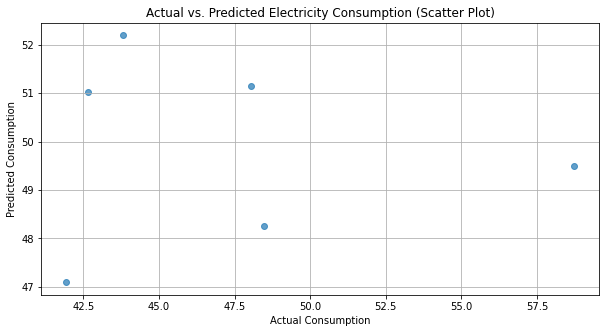

In [45]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("Actual vs. Predicted Electricity Consumption (Scatter Plot)")
plt.grid(True)
plt.show()



In step 6, we evaluate the performance of the electricity consumption forecasting model using two common evaluation metrics: Mean Squared Error (MSE) and R-squared (R2) score. Let's explain these evaluation metrics and interpret the results:

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate a better fit of the model to the data.

A low MSE (close to 0) suggests that the model's predictions are very close to the actual values, indicating good accuracy.
A higher MSE indicates that the model's predictions have larger errors or deviations from the actual values.
R-squared (R2) Score: R2 score, also known as the coefficient of determination, measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1.

An R2 score of 1 indicates that the model perfectly fits the data, explaining all the variance.
An R2 score of 0 suggests that the model does not explain any variance, performing as poorly as a horizontal line through the data.
An R2 score between 0 and 1 indicates the proportion of variance explained by the model, with higher values indicating better model fit.

Interpreting the Results:

If the MSE is low (close to 0) and the R2 score is close to 1, it means that the model has performed well in accurately forecasting electricity consumption.

If the MSE is relatively higher, it suggests that the model's predictions have larger errors or deviations from the actual consumption values.

If the R2 score is low (closer to 0), it implies that the model may not explain a significant portion of the variance in consumption, indicating a less reliable model.

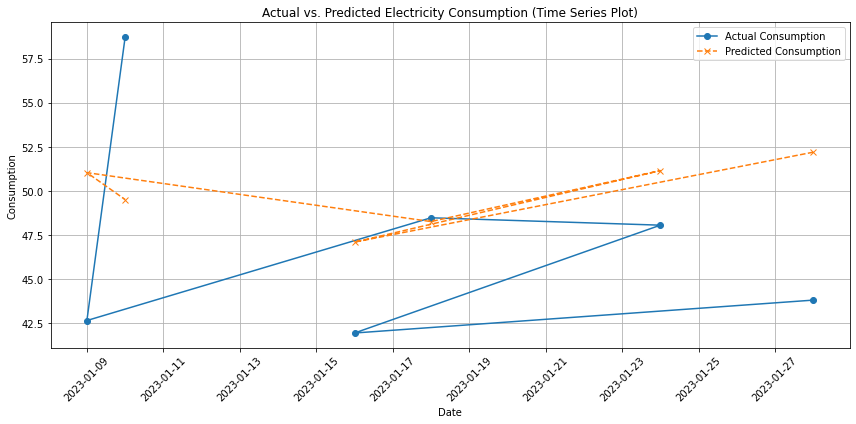

In [48]:
# Plot the time series of actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data["Date"], test_data["Consumption"], label="Actual Consumption", marker='o', linestyle='-')
plt.plot(test_data["Date"], y_pred, label="Predicted Consumption", marker='x', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("Actual vs. Predicted Electricity Consumption (Time Series Plot)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
pwd

'C:\\Users\\sajja\\Personal.Project\\ML'